In [ ]:
# https://blog.csdn.net/Claire_chen_jia/article/details/111060253

In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [73]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [75]:
df = pd.read_excel("C:/Users/沈德存/Desktop/Mathematical Modeling/K-Means聚类/例子数据.xlsx")

In [77]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  99 non-null     float64
 1   Feature2  99 non-null     float64
 2   Feature3  99 non-null     float64
 3   Feature4  99 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB


,Feature1,Feature2,Feature3,Feature4
0,2.882026,2.200079,2.489369,3.120447
1,2.933779,1.511361,2.475044,1.924321
2,1.948391,2.205299,2.072022,2.727137
3,2.380519,2.060838,2.221932,2.166837
4,2.747040,1.897421,2.156534,1.572952


In [79]:
#获取列索引
train_x = df[["Feature1", "Feature2", "Feature3", "Feature4"]]

# 数据归一化
min_max_scaler = preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

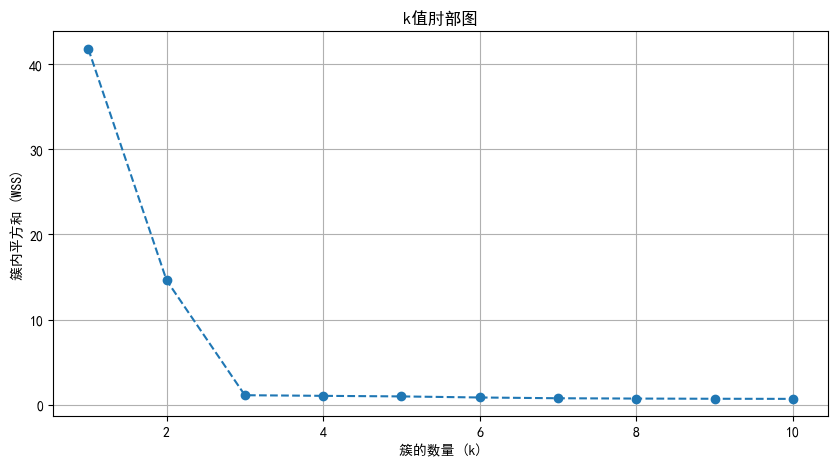

In [93]:
# 设置一系列簇的数量来测试
cluster_numbers = range(1, 11)

# 用于存储每个簇数量的损失值
wss_values = []

# 对于每个簇数量，计算损失值
for k in cluster_numbers:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(train_x)
    wss_values.append(kmeans.inertia_)

# 绘制肘部图
plt.figure(figsize=(10, 5))
plt.plot(cluster_numbers, wss_values, marker='o', linestyle='--')
plt.title('k值肘部图')
plt.xlabel('簇的数量 (k)')
plt.ylabel('簇内平方和 (WSS)')
plt.grid(True)
plt.show()

In [95]:
#根据肘部图设置簇的数量，即质心数量
k_model = KMeans(n_clusters=3)  #图中转折点在 k=3 时

# 训练模型
k_model.fit(train_x)
predict_y = k_model.predict(train_x)

df["聚类结果"] = predict_y
df

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Feature1,Feature2,Feature3,Feature4,聚类结果,TSNE1,TSNE2
0,2.882026,2.200079,2.489369,3.120447,0,-4.144343,15.056296
1,2.933779,1.511361,2.475044,1.924321,0,-4.556283,15.057672
2,1.948391,2.205299,2.072022,2.727137,0,-4.389856,15.764255
3,2.380519,2.060838,2.221932,2.166837,0,-4.356837,15.475513
4,2.747040,1.897421,2.156534,1.572952,0,-4.422563,15.220675
...,...,...,...,...,...,...,...
94,5.321657,4.214688,-5.103452,-4.559911,1,14.627923,-1.174396
95,4.150947,5.193640,-6.127782,-5.511253,1,13.471686,-0.653493
96,5.019315,4.171642,-5.492755,-5.735918,1,14.333333,-0.253345
97,5.824067,5.082114,-4.716355,-5.111338,1,14.772577,-0.764229


In [97]:
#导出聚类结果到excel中
df.to_excel("K-Means聚类结果.xlsx",index=False)

PermissionError: [Errno 13] Permission denied: 'K-Means聚类结果.xlsx'

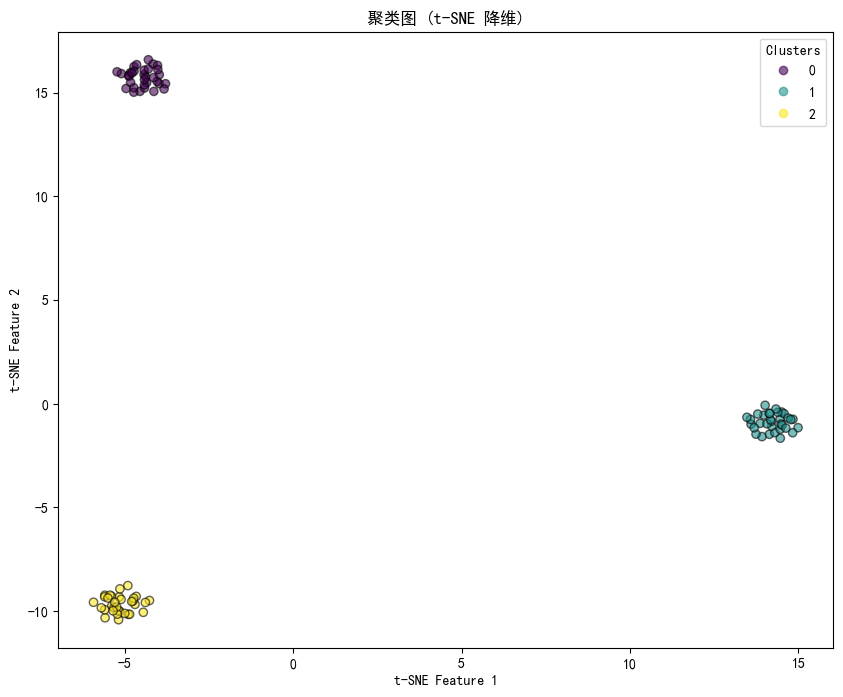

In [99]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 使用t-SNE进行非线性数据降维
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(df[['Feature1', 'Feature2', 'Feature3', 'Feature4']])

# 将t-SNE结果添加到DataFrame
df['TSNE1'] = tsne_results[:, 0]
df['TSNE2'] = tsne_results[:, 1]

# 绘制聚类图
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['TSNE1'], df['TSNE2'], c=df['聚类结果'], cmap='viridis', alpha=0.6, edgecolors='k')

# 添加图例
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('聚类图 (t-SNE 降维)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()
